<a href="https://colab.research.google.com/github/DDatachick/Loan-Prediction-app/blob/master/SCA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importation of necessary library
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [2]:
#import dataset csv into IDE
train_df = pd.read_csv('train.csv')
#summary of the data types and data size
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
#Statistical summary of dataset
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
#Snapshot of the dataset in rows and colunms
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
#Some columns are have no sigificant value to the data set. 
#Dropping such columns
train_df=train_df.drop(columns=['Loan_ID'])
#Place all relevant numerical colunms in one variable
numerical_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount']
#Assign categorical columns to a variable
categorical_cols=['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
print(numerical_cols)
print(categorical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


Variable distribution

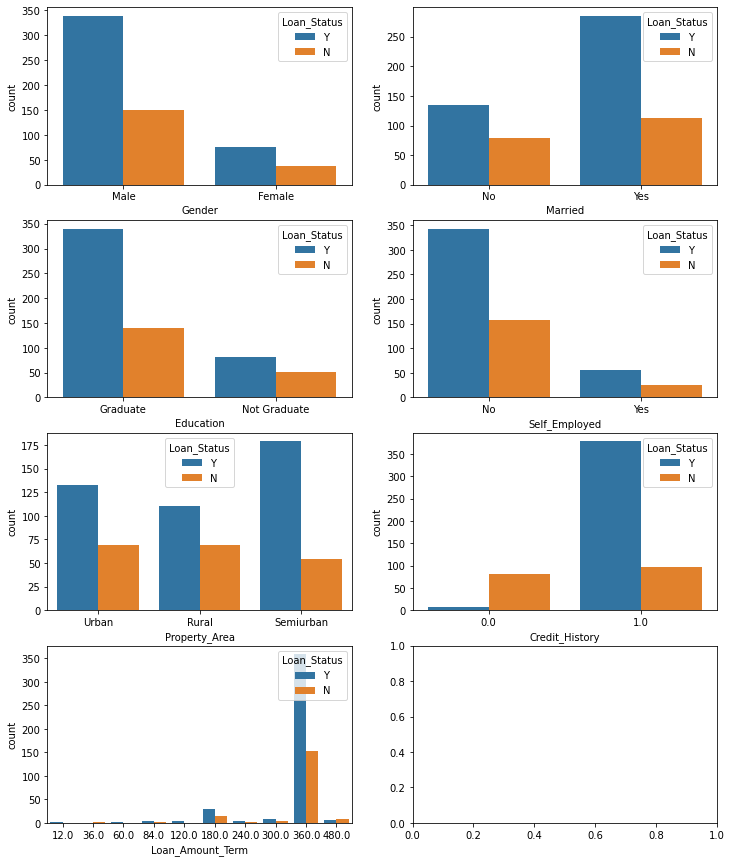

In [6]:
#Plotting distrubtion of categorical variables against my y which is the loan status
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat_col in enumerate(categorical_cols):
    row,col = i//2,i%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])

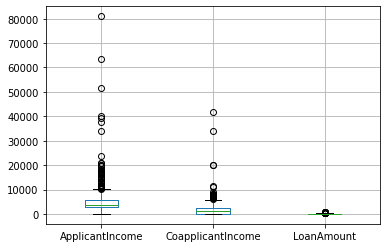

In [7]:
#Using whister boxplot to identifiy outliners
train_df.boxplot(numerical_cols)

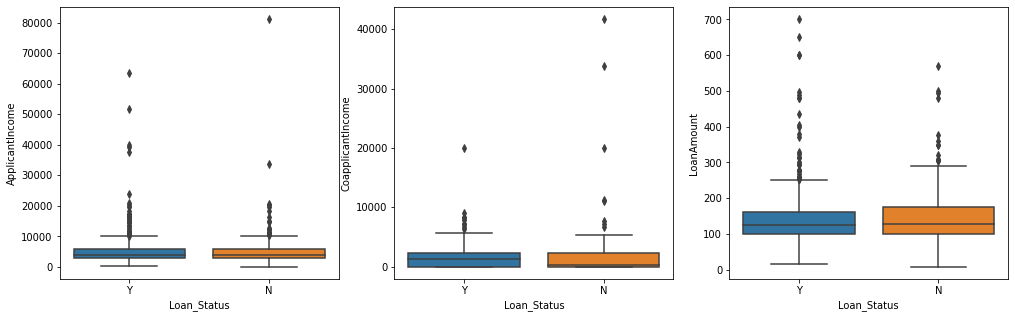

In [8]:
#Whister boxplot of numerical columns against loan status
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_cols):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

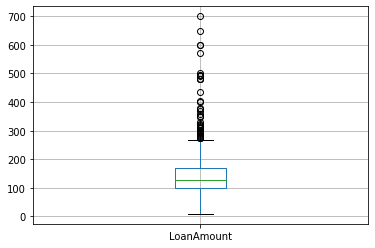

In [9]:
#Using whister boxplot to identifiy outliners
train_df.boxplot(column ='LoanAmount')

In [10]:
#Identify number of missing values
train_df['Loan_Amount_Term'].isnull().sum()

14

In [11]:
#Determine mode of varible 
train_df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [0]:
#Replacing missing value with mode
train_df['Loan_Amount_Term'].fillna(360,inplace = True)

In [13]:
#Determine mode of varible 
train_df['LoanAmount'].isnull().sum()

22

In [14]:
#Determine mode of varible 
train_df['LoanAmount'].mode()

0    120.0
dtype: float64

In [0]:
#Replacing missing value with mode
train_df['LoanAmount'].fillna(120, inplace = True)

In [16]:
#Identify number of missing values
train_df['Credit_History'].isnull().sum()

50

In [17]:
#Determine mode of varible 
train_df['Credit_History'].mode()

0    1.0
dtype: float64

In [0]:
#Replacing missing value with mode
train_df['Credit_History'].fillna(1.0, inplace = True)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [20]:
#Sum of different answers
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
#Change the loan status from Y and N to 1 and 0
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':int(0),'Y':int(1)})

In [22]:
train_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [0]:
#place selected categorical variable in one variable
data=train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
#predict='Loan_Status'		

In [24]:
#determine loan status data type
type(train_df['Loan_Status'])

pandas.core.series.Series

In [0]:
#Assign data and loan status to x and y 
x=data
y=train_df['Loan_Status']

In [0]:
#split training data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [0]:
#Fit data and predict 
model = LogisticRegression()
model.fit(x_train.values, y_train.values)
predict = model.predict(x_test)


In [33]:
y_test

307    0
224    1
554    0
406    1
476    1
      ..
105    1
467    1
548    0
490    1
32     0
Name: Loan_Status, Length: 62, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8548387096774194